DATA LOADING

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import zipfile
import requests
import io

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# Download the ZIP file
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # List files in the ZIP to see what’s available
    print(z.namelist())

    # Read the specific CSV file (e.g., 'bank-full.csv')
    data = pd.read_csv(z.open('bank-full.csv'), sep=';')

# Display the first few rows
print(data.head())



['bank-full.csv', 'bank-names.txt', 'bank.csv']
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


DATA EXPLORATION

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
                job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285  

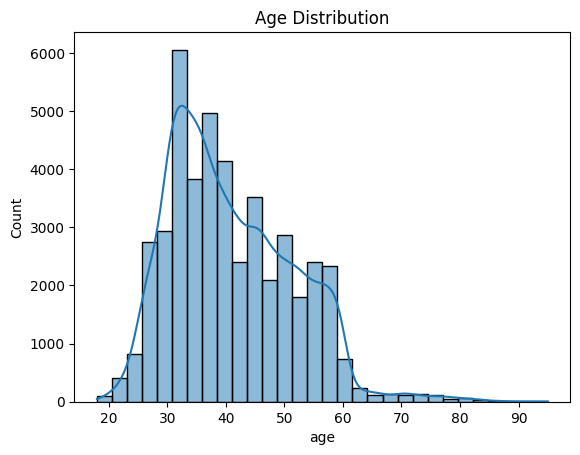

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


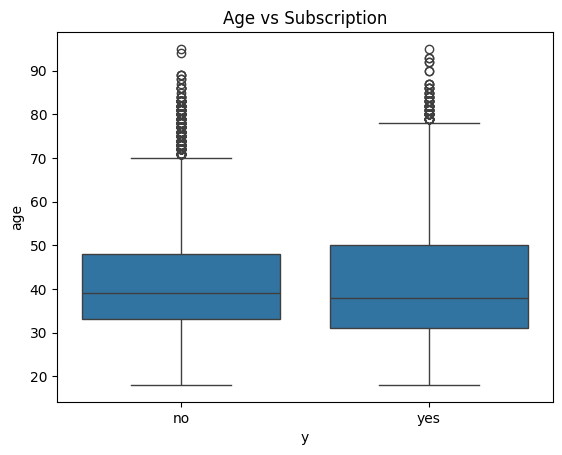

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

# Analyze categorical variables
print(data.describe(include=['object']))

# Analyze numerical variables
print(data.describe())

# Visualize data distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of age
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Example: Relationship between age and subscription
sns.boxplot(x='y', y='age', data=data)
plt.title('Age vs Subscription')
plt.show()


DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# For other categorical features, you might want to use OneHotEncoder
data = pd.get_dummies(data, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MODEL SELECTION

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0000e+00 - loss: -134.7001 - val_accuracy: 0.0000e+00 - val_loss: -2379.3689
Epoch 2/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0000e+00 - loss: -4710.7393 - val_accuracy: 0.0000e+00 - val_loss: -16519.5469
Epoch 3/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -22210.3398 - val_accuracy: 0.0000e+00 - val_loss: -47766.7461
Epoch 4/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -60350.4688 - val_accuracy: 0.0000e+00 - val_loss: -99053.9609
Epoch 5/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: -114530.8359 - val_accuracy: 0.0000e+00 - val_loss: -171942.5625
Epoch 6/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -191354.5000 - val_accuracy: 0.0000e+00 - val_loss: -269180.7500
Epoch 7/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: -296210.0625 - val_accuracy: 0.0000e+00 - val_loss: 

MODEL EVALUATION

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.58      0.34      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043

Confusion Matrix:
 [[7688  264]
 [ 721  370]]


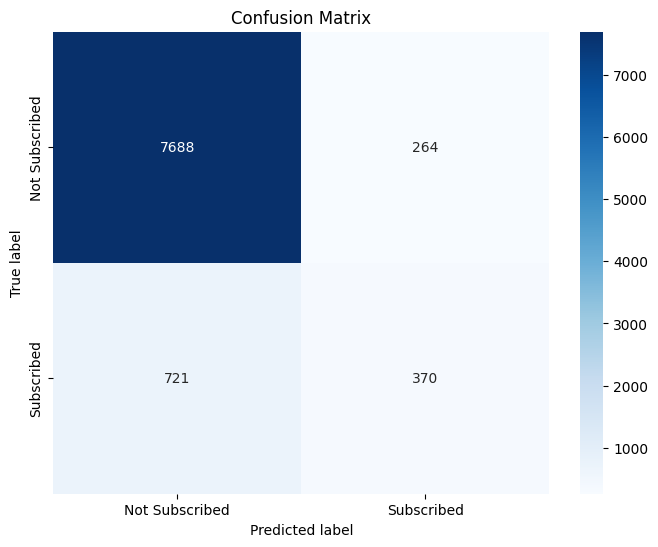

In [ ]:
# Assuming you have a model already trained
y_pred_proba = model.predict(X_test)  # Get predicted probabilities directly

# For binary classification, we can assume that the model outputs probabilities for the positive class
y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Ensure y_test is in binary format
y_test = (y_test >= 0.5).astype(int)  # Adjust based on your actual y_test values

# Evaluate performance
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Optionally, visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
print(set(y_test))  # Check unique values in y_test




{-0.36398261293351625, 2.7473839806261746}


In [ ]:
y_test = (y_test >= 0.5).astype(int)  # Adjust according to your data


In [ ]:
y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary predictions


In [ ]:
# Assuming X_test and y_test are defined

# Get predicted probabilities
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Ensure y_test is in binary format
y_test = (y_test >= 0.5).astype(int)  # This line may need adjustment based on your actual y_test values

# Check the unique values in y_test to ensure it's binary
print("Unique values in y_test:", set(y_test))

# Evaluate performance
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Unique values in y_test: {0, 1}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.58      0.34      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043

[[7688  264]
 [ 721  370]]


In [ ]:
print("y_test shape:", y_test.shape, "y_pred shape:", y_pred.shape)
print("y_test type:", type(y_test), "y_pred type:", type(y_pred))


y_test shape: (9043,) y_pred shape: (9043, 1)
y_test type: <class 'pandas.core.series.Series'> y_pred type: <class 'numpy.ndarray'>


In [ ]:
print("y_test values:", y_test[:10])  # Print the first 10 values of y_test
print("y_pred values:", y_pred[:10])  # Print the first 10 values of y_pred


y_test values: 3776     0
9928     0
33409    0
31885    0
15738    0
30813    0
35463    0
31382    0
16904    0
11930    0
Name: y, dtype: int64
y_pred values: [[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


CROSS VALIDATION

In [ ]:
import numpy as np

# Assuming your y is the target variable
print("Unique values in y:", np.unique(y))

# If the values are not 0 and 1, convert them
# Example: Convert all values greater than the threshold (e.g., 0.5) to 1, and others to 0
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Now use y_binary in cross-validation
cv_scores = cross_val_score(ann, X, y_binary, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())



Unique values in y: [-0.36398261  2.74738398]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.88333518 0.73921699 0.72826808 0.53804468 0.37535943]
Mean CV score: 0.6528448720376824


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Assuming X and y have been defined and preprocessed
# Ensure y is binary
y_binary = (y > threshold).astype(int)

# Define your model
ann = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)

# Using cross-validation
cv_scores = cross_val_score(ann, X, y_binary, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.88046002 0.58504756 0.68823269 0.55032073 0.34494581]
Mean CV score: 0.6098013612027354


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


HYPERPARAMETER TURING

In [ ]:
!pip install pandas scikit-learn
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in a pandas DataFrame called 'data'
# Identify columns with non-numerical data
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Now you can split the data into X and y and use it for training
# ... your code for splitting and training ...

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in a pandas DataFrame called 'data' and y is the target variable
# ... your code for splitting and training ...

# Convert y to numerical values if it contains strings
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Convert y to binary if it is not
threshold = 0.5  # Adjust this based on your data's context
y_binary = (y > threshold).astype(int)

# Split your dataset into training and testing sets
# ... your code for splitting and training ...

In [ ]:
import pandas as pd
import zipfile
import requests # Import requests module

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# Download the file
response = requests.get(url) # Download the file using requests
with open("bank.zip", "wb") as f: # Open a local file to write the downloaded content
    f.write(response.content)

# Open the zip file
with zipfile.ZipFile("bank.zip") as z: # Access the locally downloaded zip file
    # Identify the CSV file (replace 'bank.csv' with the actual filename if different)
    csv_file = 'bank.csv'
    # Open the csv file within the zip file
    with z.open(csv_file) as f:
        # Read the dataset
        data = pd.read_csv(f, sep=';')

# Define X and y
X = data.drop('y', axis=1)
y = data['y']

# Convert y from 'yes'/'no' to binary (1 for yes, 0 for no)
y_binary = (y == 'yes').astype(int)

# Now proceed with the train-test split and model training


FINAL EVALUATION

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


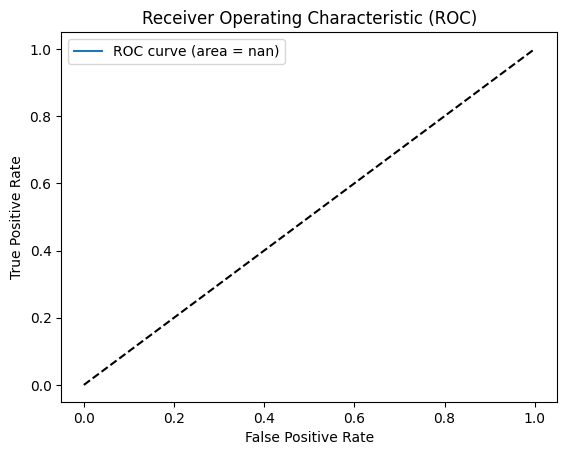

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'data' and y is the target variable
# ... your code for splitting and training ...

# Separate features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Convert y from 'yes'/'no' to binary (1 for yes, 0 for no)
y = (y == 'yes').astype(int)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = MLPClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    # Example parameters - adjust as needed
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Make sure that 'refit=True' is set in the GridSearchCV constructor.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_test_pred))

# ROC curve for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
